In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor

# Load the dataset
df = pd.read_csv('cleaned_data.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
# Prepare the features and target variable
x = df.drop(['price'], axis=1)
y = df['price']

# One hot encoding using column transformer
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,1,2,4])],remainder='passthrough')
x=ct.fit_transform(x)

# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Create KNN regressor instance
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the KNN regressor on the training data
knn_regressor.fit(x_train, y_train)

# Predicting the test set results
y_pred_knn = knn_regressor.predict(x_test)

# Print the accuracy of the model
print('Accuracy of KNN regressor on test set: {:.2f}'.format(knn_regressor.score(x_test, y_test)))


Accuracy of KNN regressor on test set: 0.90


In [29]:
#calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred_knn)
print('Mean absolute error of KNN regressor on test set: {:.2f}'.format(mae))


Mean absolute error of KNN regressor on test set: 1778395.88


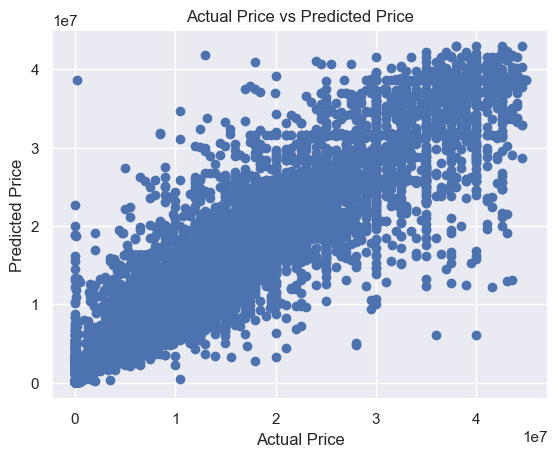

In [18]:
#show model performance using Graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.scatter(y_test,y_pred_knn)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()


In [2]:
#save the model
import pickle
pickle.dump(knn_regressor, open('KNN_model.pkl','wb'))
print('Model saved as model.pkl')


Model saved as model.pkl


In [3]:
#load the KNN_model
KNN_model = pickle.load(open('KNN_model.pkl','rb'))
print('KNN_model loaded as KNN_model.pkl')


KNN_model loaded as KNN_model.pkl


In [58]:
import numpy as np
# %%
# Load the KNN_model
with open('KNN_model.pkl', 'rb') as model_file:
    loaded_knn_model = pickle.load(model_file)

print('KNN_model loaded successfully.')

# %%
# Use the loaded model to make predictions
user_input = np.array(
    [['House', 'North Karachi', 'Karachi', 2, 'For Sale', 2, 1.83654]])

# Creating a DataFrame from the user input
user_input_df = pd.DataFrame(
    user_input, columns=['property_type', 'location', 'city', 'baths', 'purpose', 'bedrooms', 'Area_in_Marla'])


KNN_model loaded successfully.


In [59]:
user_input_df.to_csv('user_input.csv', index=False)

In [60]:
# %%
# Load the KNN_model
with open('KNN_model.pkl', 'rb') as model_file:
    loaded_knn_model = pickle.load(model_file)

print('KNN_model loaded successfully.')

# %%
# Use the loaded model to make predictions
user_input = pd.read_csv('user_input.csv')
# Transforming the user input DataFrame with the loaded ColumnTransformer
user_input_transformed = ct.transform(user_input_df)

# Predicting the price with the loaded model
predicted_price = loaded_knn_model.predict(user_input_transformed)

# Output the predicted price
print('Predicted Price:', predicted_price[0])

# %%


KNN_model loaded successfully.
Predicted Price: 7360000.0
